In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-attrition/employee_attrition_test.csv
/kaggle/input/employee-attrition/employee_attrition_train.csv


In [2]:
data = pd.read_csv('/kaggle/input/employee-attrition/employee_attrition_train.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

# UNDERSTANDING DATA DISTRIBUTION

['No' 'Yes']


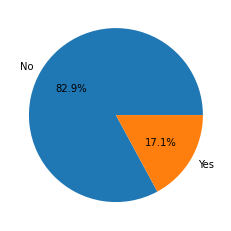

In [4]:
# check for imbalanced data
print(data['Attrition'].unique())
plt.pie(data['Attrition'].value_counts(), autopct='%1.1f%%', labels=['No', 'Yes']);

In [5]:
def plot_category(feature, figsize=None):
    yes_count = data[data['Attrition']=='Yes'].groupby([feature]).size()
    no_count = data[data['Attrition']=='No'].groupby([feature]).size()
    labels = no_count.index

    x = np.arange(len(labels)) # the label locations
    width = 0.35  # the width of the bars

    if figsize:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig, ax = plt.subplots()
    rects1 = ax.bar(x-width/2, round(yes_count*100/data.groupby([feature]).size(), 2), 
                    width, label='Yes')
    rects2 = ax.bar(x+width/2, round(no_count*100/data.groupby([feature]).size(), 2), 
                    width, label='No')

    ax.set_ylabel('Count')
    ax.set_title('Based on %s'%feature)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=80)
    ax.legend();

    ax.bar_label(rects1, padding=1)
    ax.bar_label(rects2, padding=1)

    fig.tight_layout()
    plt.show()
    
def plot_numerical(feature, figsize=None):
    # Attrition vs Age Distribution
    fig = plt.figure(figsize=(10,6))

    sns.kdeplot(data[data['Attrition']=='No'][feature])
    sns.kdeplot(data[data['Attrition']=='Yes'][feature])

    fig.legend(labels=['Attrition No', 'Attrition Yes'])
    plt.title('Based on %s'%feature)
    plt.show()

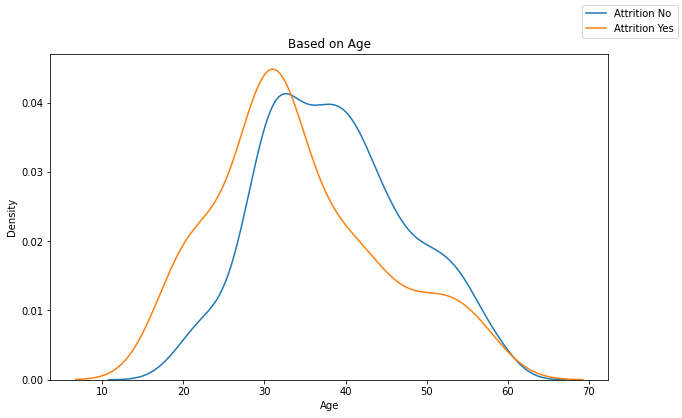

In [6]:
for feature in ['Age']:
    plot_numerical(feature)

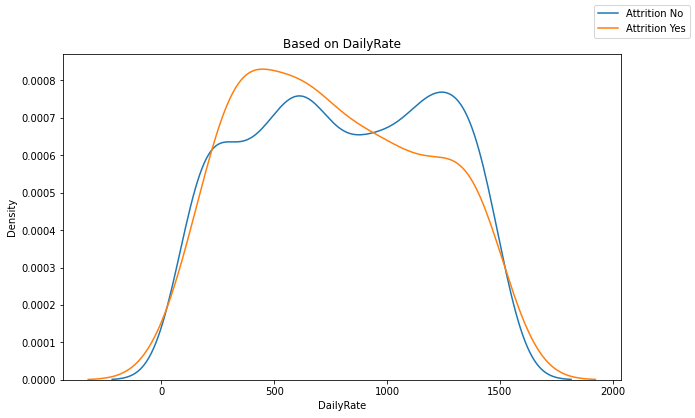

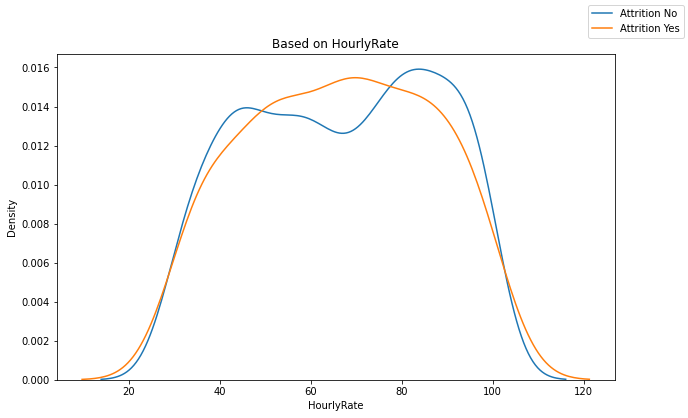

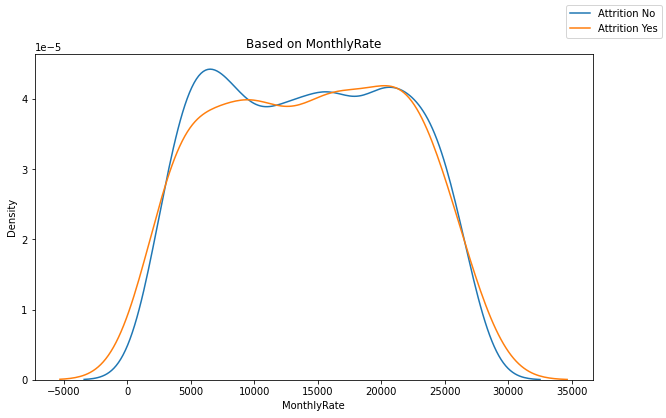

In [7]:
for feature in ['DailyRate', 'HourlyRate', 'MonthlyRate']:
    plot_numerical(feature)

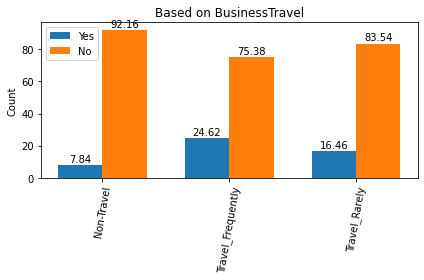

In [8]:
for feature in ['BusinessTravel']:
    plot_category(feature)

So More you travel higher the chances of attrition

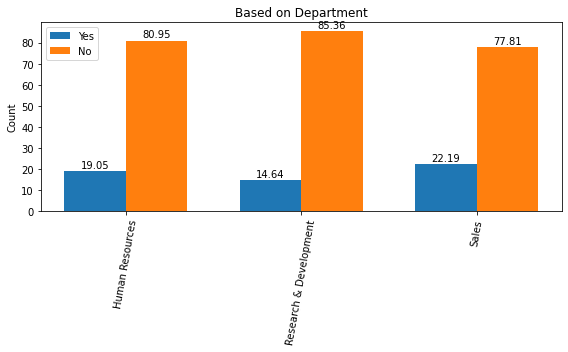

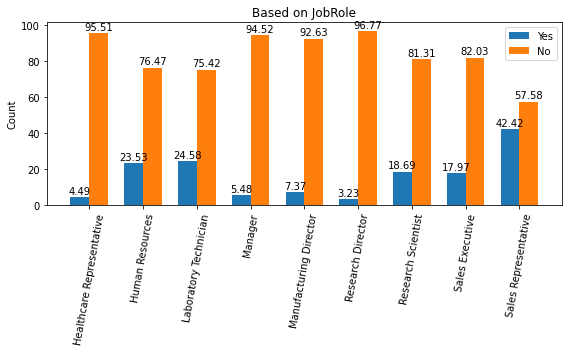

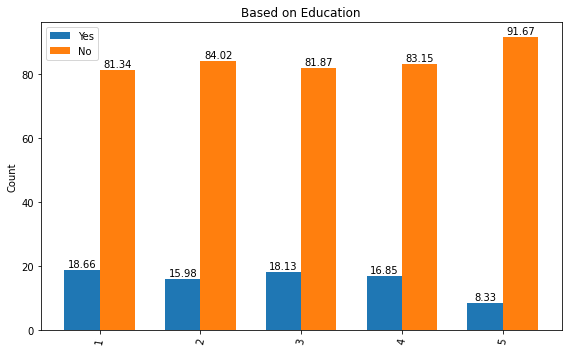

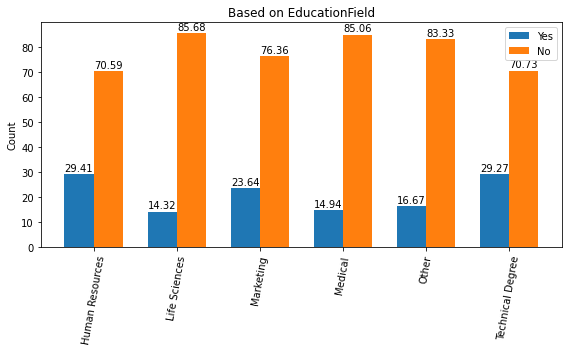

In [9]:
for feature in ['Department', 'JobRole', 'Education', 'EducationField']:
    plot_category(feature, figsize=(8,5))

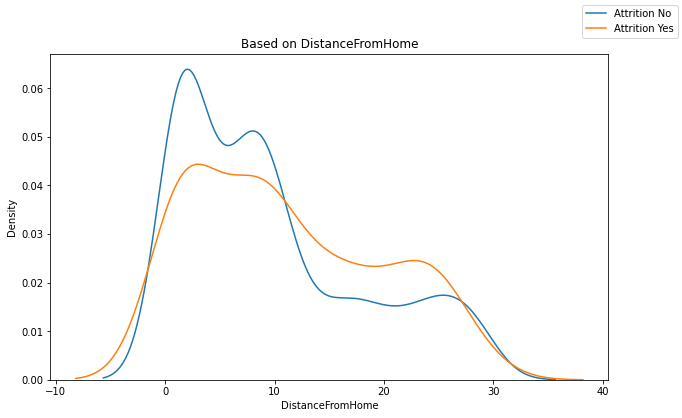

In [10]:
for feature in ['DistanceFromHome']:
    plot_numerical(feature)

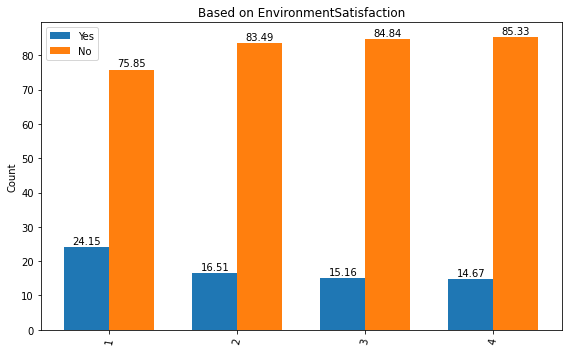

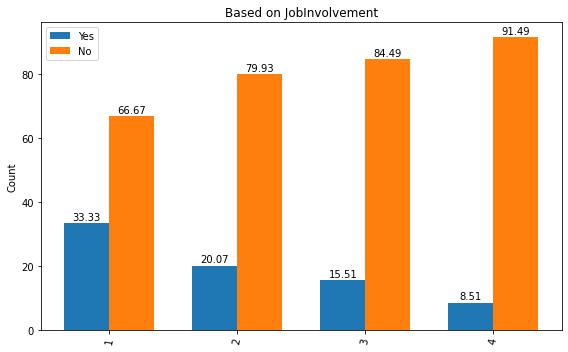

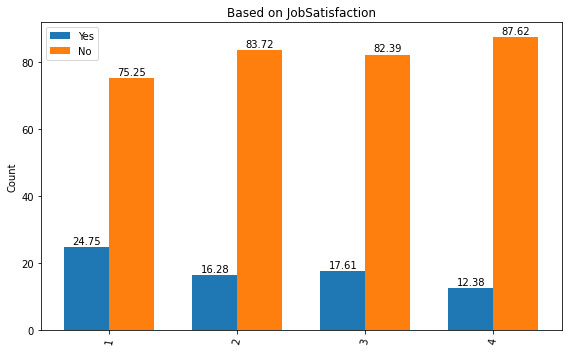

In [11]:
for feature in ['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction']:
    plot_category(feature, figsize=(8,5))

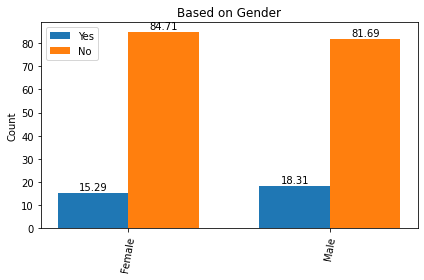

In [12]:
for feature in ['Gender']:
    plot_category(feature)

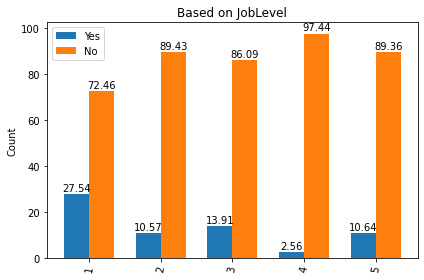

In [13]:
for feature in ['JobLevel']:
    plot_category(feature)

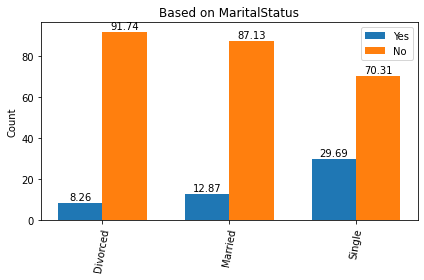

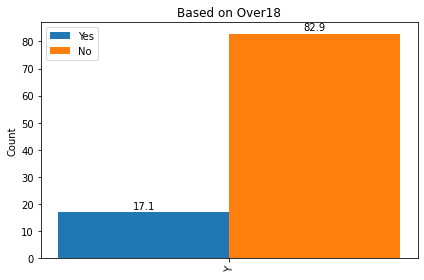

In [14]:
for feature in ['MaritalStatus', 'Over18']:
    plot_category(feature)

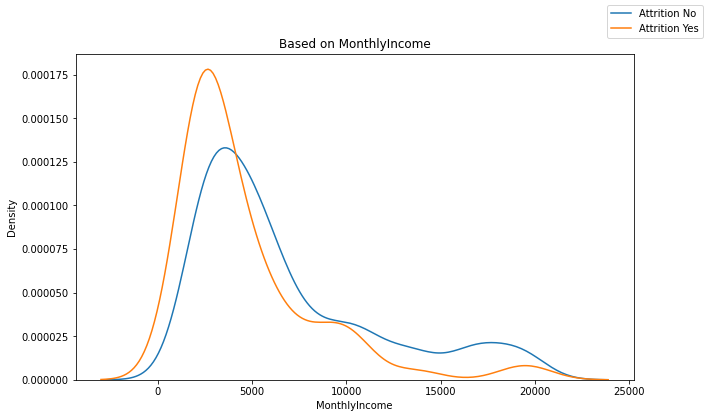

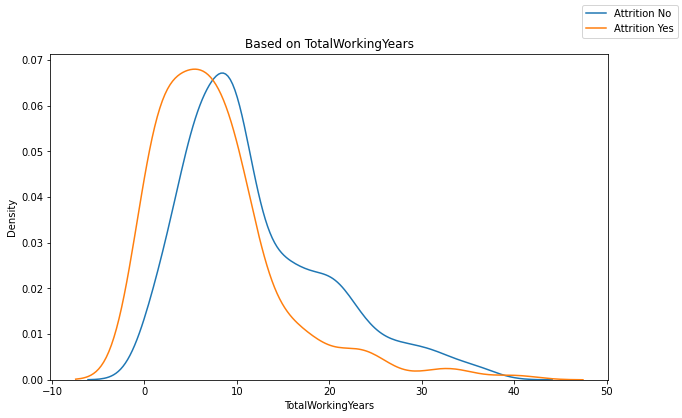

In [15]:
for feature in ['MonthlyIncome', 'TotalWorkingYears']:
    plot_numerical(feature)

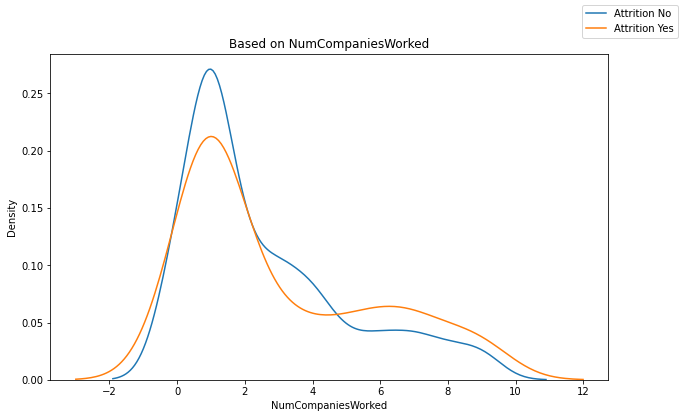

In [16]:
for feature in ['NumCompaniesWorked']:
    plot_numerical(feature, figsize=(8,5))

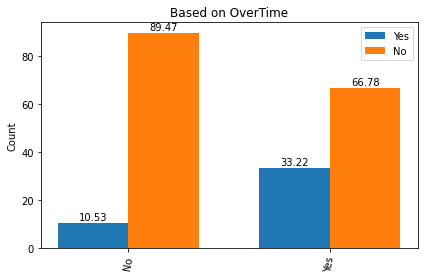

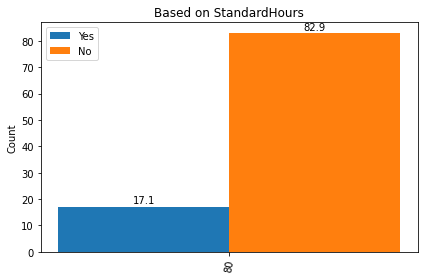

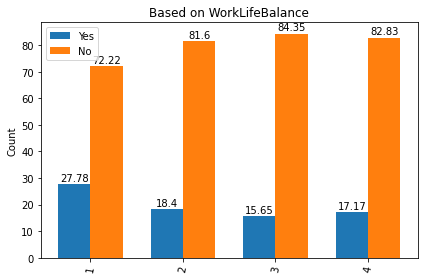

In [17]:
for feature in ['OverTime', 'StandardHours', 'WorkLifeBalance']:
    plot_category(feature)

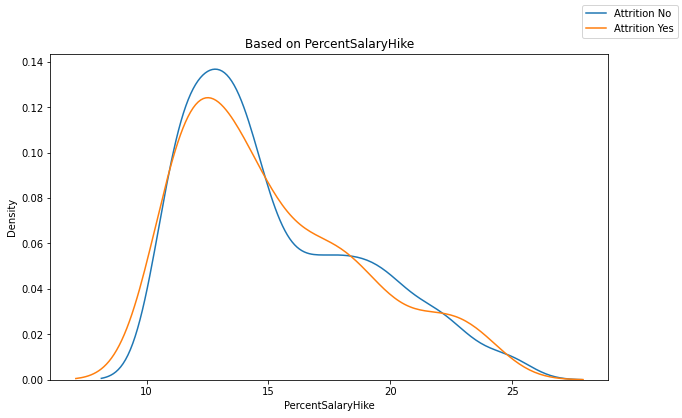

In [18]:
for feature in ['PercentSalaryHike']:
    plot_numerical(feature)

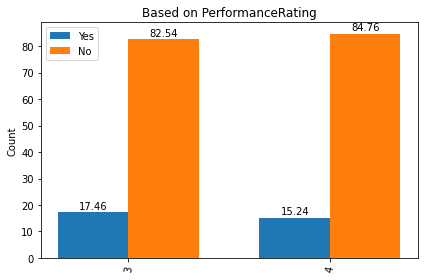

In [19]:
for feature in ['PerformanceRating']:
    plot_category(feature)

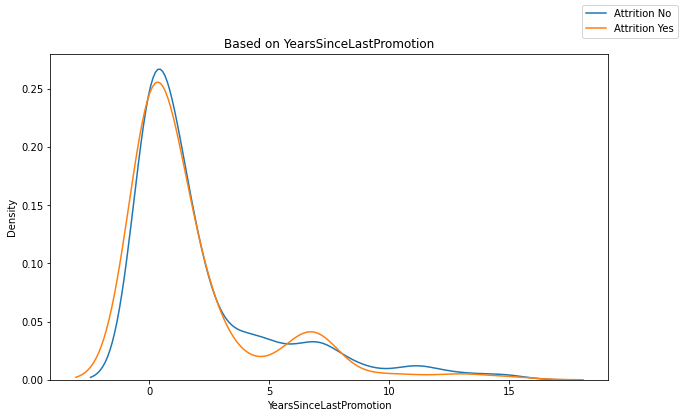

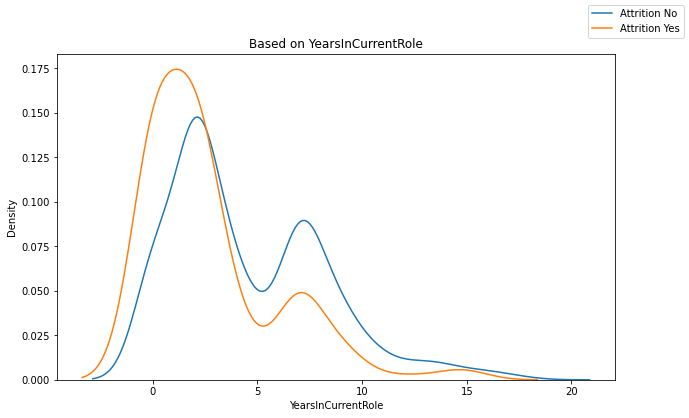

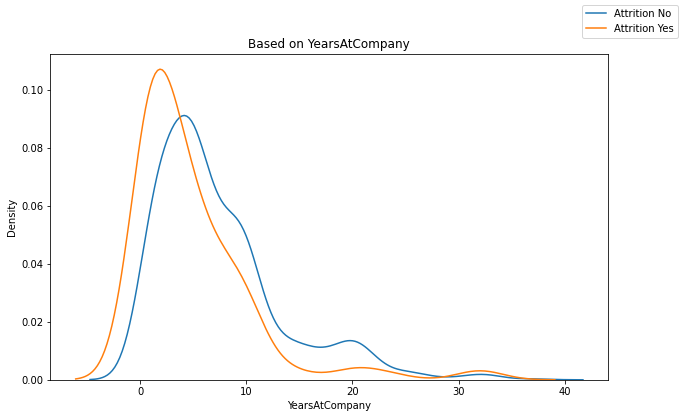

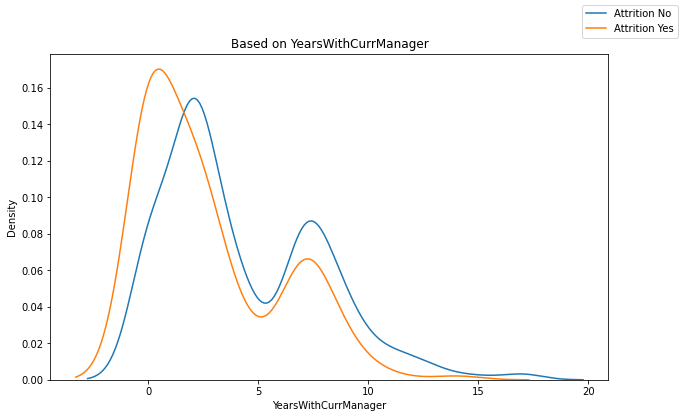

In [20]:
for feature in ['YearsSinceLastPromotion', 'YearsInCurrentRole', 'YearsAtCompany', 
                'YearsWithCurrManager']:
    plot_numerical(feature)

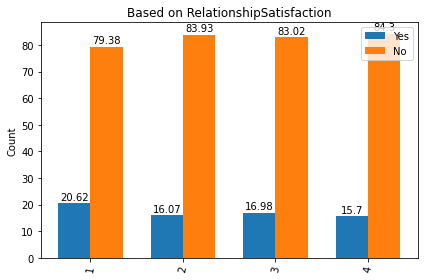

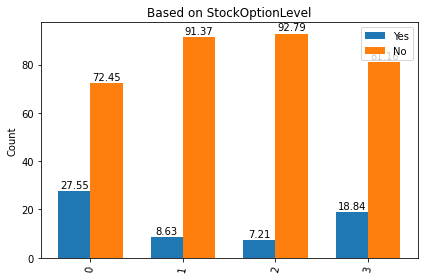

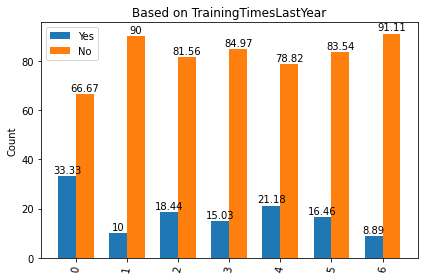

In [21]:
for feature in [ 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear']:
    plot_category(feature)

**Columns that seem to contribute towards Attrition:**<br>
1. YearsWithCurrManager < 5
2. YearsAtCompany < 5
3. YearsInCurrentRole < 4
4. TotalWorkingHours < 10
6. DailyRate < 1000
7. NumCompaniesWorked > 5
8. MonthlyIncome < 5000
9. Age < 35
10. TrainingTimeLastYear - 0
11. StockOptionLevel - 0 
12. OverTime - yes 
13. JobRole - Sales Representative
14. Married - Single
15. JobLevel - 1
16. BusinessTravel - travel frequently
17. EducationField - Technical Field, Human Resources
18. WorkLifeBalance - 1
19. EnvironmentSatisfaction - 1
20. JobInvolvement - 1
21. JobSatisfaction - 1

In [22]:
categorical_features = ['BusinessTravel', 'Department', 'JobRole', 'Education', 
                        'EducationField', 'Gender', 'MaritalStatus', 'OverTime']
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
                      'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                      'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
                      'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                      'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                      'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                      'YearsWithCurrManager']

to_drop = ['StandardHours', 'Over18', 'EmployeeCount', 'EmployeeNumber'] # contain only single unique value

# Label Encoding Categorical Features for Correlation (includes missing values)

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import os
import joblib

In [24]:
df = data.copy()
path = '/kaggle/working'
for i, feature in enumerate(categorical_features):
    le = LabelEncoder()

    # create directory to save label encoding models
    if not os.path.exists(os.path.join(path, "TextEncoding")):
        os.makedirs(os.path.join(path, "TextEncoding"))

    # perform label encoding
    le.fit(df[feature])
    
    # save the encoder
    joblib.dump(le, open(os.path.join(path, "TextEncoding/le_{}.sav".format(feature)), 'wb'))
    
    # transfrom training data
    df[feature] = le.transform(df[feature])

    # get classes & remove first column to elude from dummy variable trap
    columns = list(map(lambda x: feature+' '+str(x), list(le.classes_)))[1:]
    
    # save classes
    joblib.dump(columns, 
                open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'wb'))

# CORRELATION

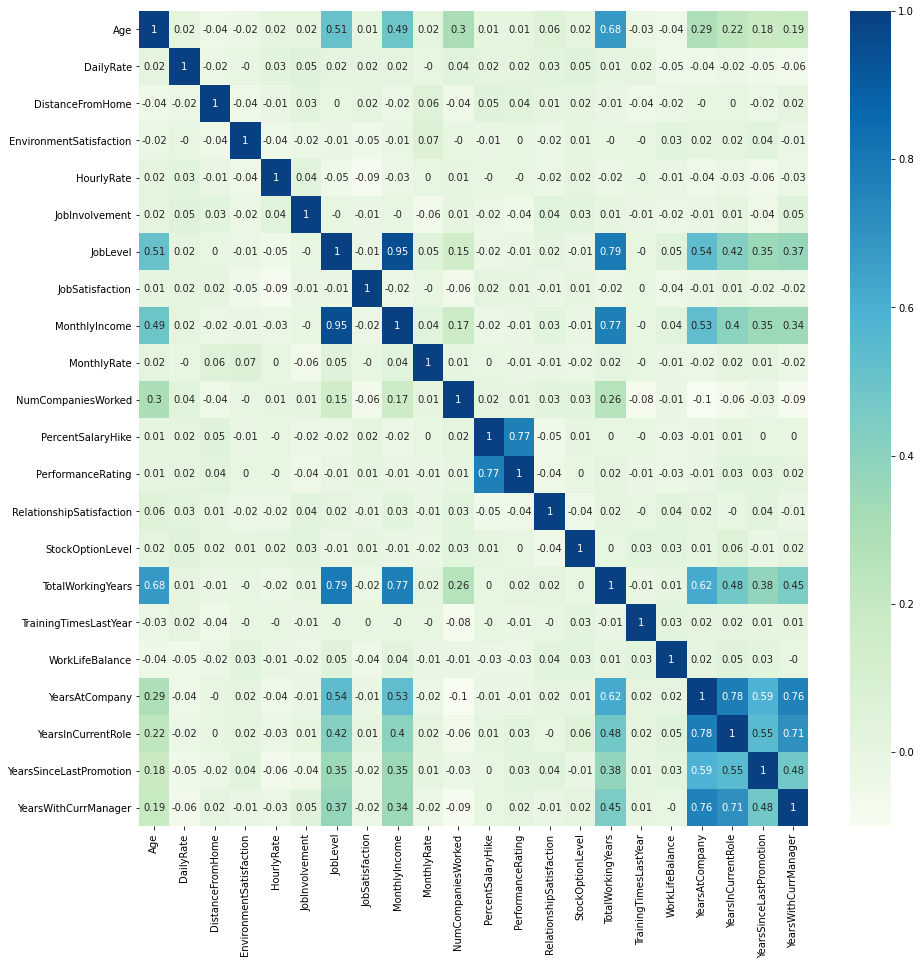

In [25]:
# Bivariate Analysis Correlation plot with the Numeric variables
plt.figure(figsize=(15, 15))
sns.heatmap(round(data[numerical_features].corr(), 2), annot=True,
            mask=None, cmap='GnBu')
corr_mat = data[numerical_features].corr()
plt.show()

In [26]:
# Correlated Features
s = corr_mat.unstack()
so = s.sort_values(kind="quicksort").drop_duplicates()
res1 = so[so>=0.5]
print(res1)

JobLevel                 Age                        0.506348
MonthlyIncome            YearsAtCompany             0.525311
JobLevel                 YearsAtCompany             0.544920
YearsInCurrentRole       YearsSinceLastPromotion    0.545809
YearsSinceLastPromotion  YearsAtCompany             0.592912
TotalWorkingYears        YearsAtCompany             0.624096
                         Age                        0.676650
YearsWithCurrManager     YearsInCurrentRole         0.705717
YearsAtCompany           YearsWithCurrManager       0.759755
MonthlyIncome            TotalWorkingYears          0.773499
PercentSalaryHike        PerformanceRating          0.774110
YearsAtCompany           YearsInCurrentRole         0.777925
JobLevel                 TotalWorkingYears          0.786130
                         MonthlyIncome              0.952756
Age                      Age                        1.000000
dtype: float64


**Observations:**

1. As age increases the TotalWorkingYears(experience) increases.
2. Monthly Income is directly proportional to Job level & TotalWorkingYears. Employees at Higher position & more experience gets more income.
3. Higher performance rating bring higher percent salary hikes
4. TotalWorkingYears-YearsAtCompany shows that people who have more experience might be liking to continue their association with the company
5. YearsAtCompany, YearsWithCurrManager, YearsInCurrentRole shows a positive correlation among each other.

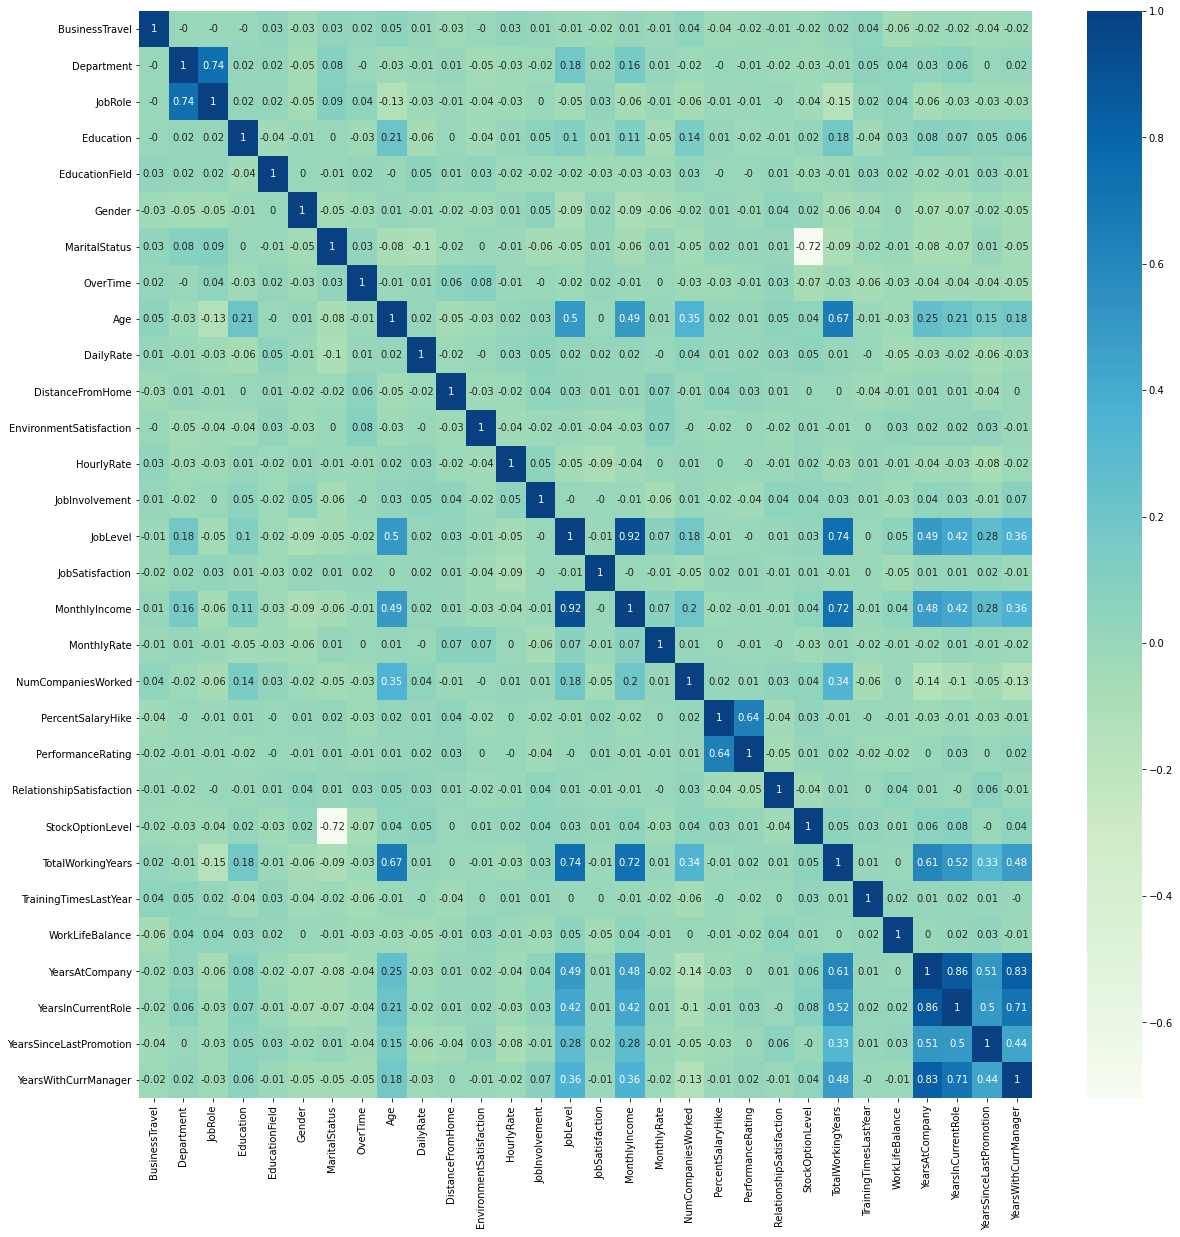

In [27]:
# Bivariate Analysis Correlation plot with the Categorical variables
plt.figure(figsize=(20, 20))
sns.heatmap(round(df[categorical_features+numerical_features].corr(method='spearman'), 2), annot=True,
            mask=None, cmap='GnBu')
plt.show()

**Observations:**

1. Department - JobRole
2. MaritalStatus - StockOptionLevel (-)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
# Calculating VIF
vif = pd.DataFrame()
temp = df.dropna()
vif["variables"] = [feature for feature in categorical_features+numerical_features if feature not in ['PerformanceRating', 'JobLevel',
                                                                                                     'Age', 'PercentSalaryHike',
                                                                                                     'WorkLifeBalance', 'JobInvolvement',
                                                                                                     'Department', 'YearsAtCompany']]
vif["VIF"] = [variance_inflation_factor(temp[vif['variables']].values, i) for i in range(len(vif["variables"]))]
print(vif)

                   variables       VIF
0             BusinessTravel  6.135905
1                    JobRole  4.480403
2                  Education  4.200312
3             EducationField  3.811301
4                     Gender  2.423586
5              MaritalStatus  5.137959
6                   OverTime  1.418709
7                  DailyRate  4.587864
8           DistanceFromHome  2.366213
9    EnvironmentSatisfaction  6.447233
10                HourlyRate  9.966712
11           JobSatisfaction  6.764457
12             MonthlyIncome  7.168169
13               MonthlyRate  4.783558
14        NumCompaniesWorked  2.549961
15  RelationshipSatisfaction  6.697170
16          StockOptionLevel  3.157192
17         TotalWorkingYears  9.931503
18     TrainingTimesLastYear  5.536564
19        YearsInCurrentRole  5.768356
20   YearsSinceLastPromotion  2.306280
21      YearsWithCurrManager  5.095782


# Handling Missing Values

In [30]:
missingValueFeatures = pd.DataFrame({'missing %': data.isnull().sum()*100/len(data)})
missingValueFeatures[missingValueFeatures['missing %']>0]

,missing %
Age,13.216715
BusinessTravel,0.485909
DailyRate,2.623907
DistanceFromHome,9.232264
MaritalStatus,0.485909


|Column|Correlation|
|---|---|
|Age|TotalWorkingYears| 
|BusinessTravel|NA| 
|DailyRate|   NA|
|DistanceFromHome|NA|
|MaritalStatus|StockOptionLevel|

We can impute missing values as per the correlation table above. Columns with NA values can be replaced by mean, mode, median or back fill methods

In [31]:
# Imputing BusinessTravel with Back fill
print('Before Imputation:')
print(data[['BusinessTravel']].value_counts())
data['BusinessTravel'].fillna(method='bfill', inplace=True)
print('\nAfter Imputation:')
print(data[['BusinessTravel']].value_counts())

Before Imputation:
BusinessTravel   
Travel_Rarely        723
Travel_Frequently    199
Non-Travel           102
dtype: int64

After Imputation:
BusinessTravel   
Travel_Rarely        726
Travel_Frequently    200
Non-Travel           103
dtype: int64


In [32]:
# Imputing DailyRate and DistanceFromHome with Mean values
print('Before Imputation:')
print(data[['DailyRate', 'DistanceFromHome']].describe().T)
data[['DailyRate', 'DistanceFromHome']] = data[['DailyRate', 'DistanceFromHome']].fillna(data[['DailyRate', 'DistanceFromHome']].mean())
print('\nAfter Imputation:')
print(data[['DailyRate', 'DistanceFromHome']].describe().T)

Before Imputation:
                   count        mean         std    min     25%    50%  \
DailyRate         1002.0  800.528942  408.109828  102.0  458.25  801.5   
DistanceFromHome   934.0    9.930407    8.421791    1.0    2.00    8.0   

                     75%     max  
DailyRate         1162.0  1496.0  
DistanceFromHome    16.0    29.0  

After Imputation:
                   count        mean         std    min    25%         50%  \
DailyRate         1029.0  800.528942  402.714749  102.0  466.0  800.528942   
DistanceFromHome  1029.0    9.930407    8.023220    1.0    2.0    9.000000   

                     75%     max  
DailyRate         1153.0  1496.0  
DistanceFromHome    14.0    29.0  


In [33]:
# Imputing Age as per TotalWorkingYears

print('Before Imputation:')
print(data[['Age']].describe().T)

data.sort_values(by='TotalWorkingYears', inplace=True)

# now use backfill method to replace Age
data['Age'].fillna(method='bfill', inplace=True)

print('\nAfter Imputation:')
print(data[['Age']].describe().T)

Before Imputation:
     count       mean       std   min   25%   50%   75%   max
Age  893.0  37.930571  9.395978  18.0  31.0  37.0  44.0  60.0

After Imputation:
      count       mean       std   min   25%   50%   75%   max
Age  1029.0  37.349854  9.254931  18.0  31.0  36.0  43.0  60.0


In [34]:
# Imputing MaritalStatus as per StockOptionLevel
print(pd.crosstab(data['MaritalStatus'], data['StockOptionLevel']))
print('\nStockOptionLevel Distribution across missing MaritalStatus values:')
print(data[data['MaritalStatus'].isna()]['StockOptionLevel'])

StockOptionLevel    0    1   2   3
MaritalStatus                     
Divorced            6  133  54  37
Married           106  280  56  32
Single            320    0   0   0

StockOptionLevel Distribution across missing MaritalStatus values:
105    1
89     1
150    1
10     1
107    2
Name: StockOptionLevel, dtype: int64


In [35]:
# For StockOptionLevel 1 & 2 mode of MaritalStatus is Married
print('\nBefore Imputation:')
print(data[['MaritalStatus']].value_counts())
data['MaritalStatus'].fillna(data['MaritalStatus'].mode()[0], inplace=True)
print('\nAfter Imputation:')
print(data[['MaritalStatus']].value_counts())


Before Imputation:
MaritalStatus
Married          474
Single           320
Divorced         230
dtype: int64

After Imputation:
MaritalStatus
Married          479
Single           320
Divorced         230
dtype: int64


In [36]:
# verifying missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 424 to 537
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1029 non-null   float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1029 non-null   object 
 3   DailyRate                 1029 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          1029 non-null   float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLeve

# Looking at Outliers

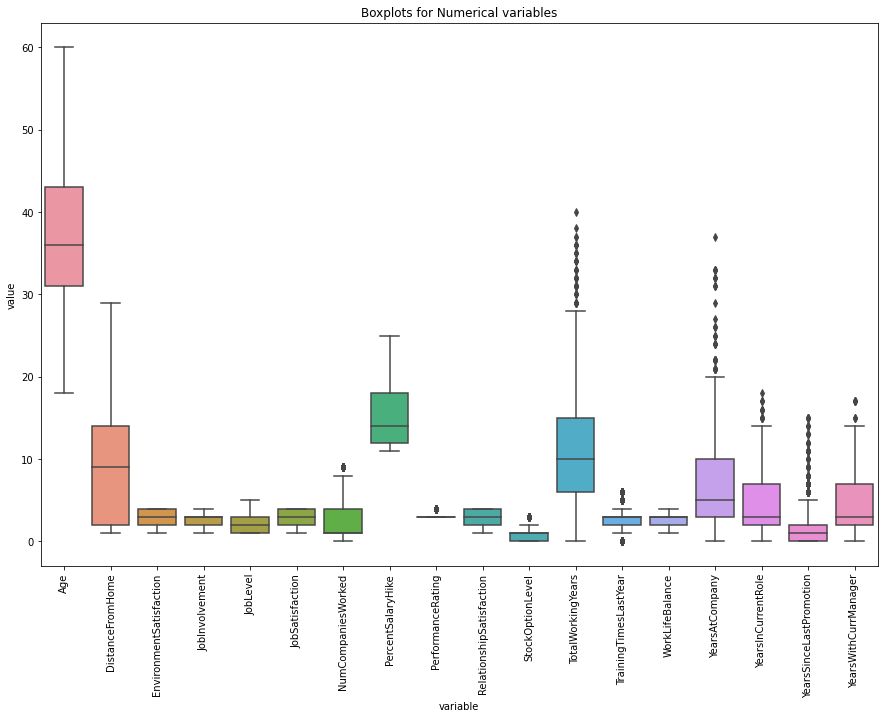

In [37]:
NumericData = data[[feature for feature in numerical_features if feature not in ['MonthlyIncome', 
                                                                               'MonthlyRate', 
                                                                               'DailyRate',
                                                                              'HourlyRate']]]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp = sns.boxplot(x='variable', y='value', data=NumericMelt)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

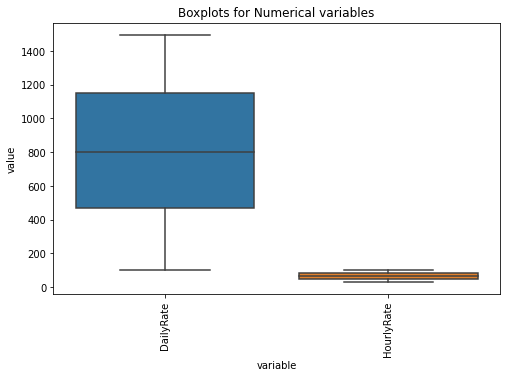

In [38]:
NumericData = data[['DailyRate', 'HourlyRate']]
# skipping 'MonthlyIncome', 'MonthlyRate', 'DailyRate' 
# due to very different range of values compared to others
NumericMelt = NumericData.melt()
plt.figure(figsize=(8,5))
plt.title("Boxplots for Numerical variables")
bp = sns.boxplot(x='variable', y='value', data=NumericMelt)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

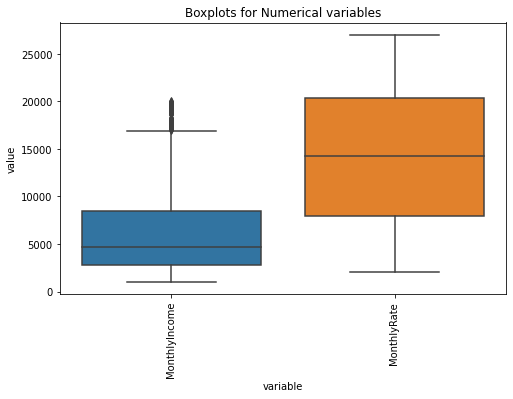

In [39]:
NumericData = data[['MonthlyIncome', 'MonthlyRate']]
# skipping 'MonthlyIncome', 'MonthlyRate', 'DailyRate' 
# due to very different range of values compared to others
NumericMelt = NumericData.melt()
plt.figure(figsize=(8,5))
plt.title("Boxplots for Numerical variables")
bp = sns.boxplot(x='variable', y='value', data=NumericMelt)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

**Columns with Outlier values:**<br>
1. TotalWorkingYears
2. YearsAtCompany
3. YearsInCurrentRole
4. YearsSinceLastPromotion
5. YearsWithCurrManager
6. TrainingTimesLastYear
7. NumCompaniesWorked
8. MonthlyIncome<br>
Other columns like PerformanceRating are not considered in outliers as they have very few unique values

In [40]:
# Percentage of outliers present in each variable
outlier_percentage = {}
for feature in ['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                'YearsWithCurrManager', 'TrainingTimesLastYear', 'NumCompaniesWorked', 'MonthlyIncome']:
    tempData = data.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage

{'TotalWorkingYears': 4.37,
 'YearsAtCompany': 4.18,
 'YearsInCurrentRole': 1.55,
 'YearsSinceLastPromotion': 14.48,
 'YearsWithCurrManager': 0.87,
 'TrainingTimesLastYear': 15.84,
 'NumCompaniesWorked': 3.69,
 'MonthlyIncome': 6.61}

In [41]:
# Outlier treatment with more thatn 4% outlier values
df_outlier = data.copy()
for feature in ['TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'TrainingTimesLastYear', 'MonthlyIncome']:
    tempData = df_outlier.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)    
    df_outlier.loc[(df_outlier[feature]<(Q1 - 1.5 * IQR))|(df_outlier[feature]>(Q3 + 1.5 * IQR)), 
                   feature] = Upper_range

# Handling Categorical Features (Label and One Hot Encoding)

In [42]:
df = df_outlier.copy()
path = '/kaggle/working'
for i, feature in enumerate(categorical_features):
    
    le = LabelEncoder()
    ohe = OneHotEncoder(sparse=False)

    # create directory to save label encoding models
    if not os.path.exists(os.path.join(path, "TextEncoding")):
        os.makedirs(os.path.join(path, "TextEncoding"))

    # perform label encoding
    le.fit(df[feature])
    # save the encoder
    joblib.dump(le, open(os.path.join(path, "TextEncoding/le_{}.sav".format(feature)), 'wb'))
    
    # transfrom training data
    df[feature] = le.transform(df[feature])

    # get classes & remove first column to elude from dummy variable trap
    columns = list(map(lambda x: feature+' '+str(x), list(le.classes_)))[1:]
    
    # save classes
    joblib.dump(columns, 
                open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'wb'))
    # load classes
    columns = joblib.load(
        open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'rb'))

    if len(le.classes_)>2:
        # perform one hot encoding
        ohe.fit(df[[feature]])
        # save the encoder
        joblib.dump(ohe, 
                    open(os.path.join(path, "TextEncoding/ohe_{}.sav".format(feature)), 'wb'))

        # transfrom training data
        # removing first column of encoded data to elude from dummy variable trap
        tempData = ohe.transform(df[[feature]])[:, 1:]

        # create Dataframe with columns as classes
        tempData = pd.DataFrame(tempData, columns=columns)
    else:
        tempData = df[feature]
    
    # create dataframe with all the label encoded categorical features along with hot encoding
    if i==0:
        encodedData = pd.DataFrame(data=tempData, columns=tempData.columns.values.tolist())
    else:
        encodedData = pd.concat([encodedData, tempData], axis=1)

In [43]:
# merge numerical features and categorical encoded features
df = df[numerical_features+['Attrition']]
df = pd.concat([df, encodedData], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 0 to 1028
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1029 non-null   float64
 1   DailyRate                          1029 non-null   float64
 2   DistanceFromHome                   1029 non-null   float64
 3   EnvironmentSatisfaction            1029 non-null   int64  
 4   HourlyRate                         1029 non-null   int64  
 5   JobInvolvement                     1029 non-null   int64  
 6   JobLevel                           1029 non-null   int64  
 7   JobSatisfaction                    1029 non-null   int64  
 8   MonthlyIncome                      1029 non-null   int64  
 9   MonthlyRate                        1029 non-null   int64  
 10  NumCompaniesWorked                 1029 non-null   int64  
 11  PercentSalaryHike                  1029 non-null   int64

# Training Model

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC

In [45]:
train_data = df.copy()
feature_cols = [feature for feature in train_data.columns if feature not in(['Attrition', 'PerformanceRating', 'JobLevel',
                                                                             'Age', 'PercentSalaryHike',
                                                                             'WorkLifeBalance', 'JobInvolvement',
                                                                             'YearsAtCompany', 'Department Research & Development',
                                                                             'Department Sales'])]

''' Rescaling to [0,1] '''
scaler = MinMaxScaler()
scaler.fit(train_data[feature_cols])
train_data[feature_cols] = scaler.transform(train_data[feature_cols])

In [46]:
X = train_data[feature_cols]
y = train_data['Attrition']
y.replace('No', 0, inplace=True)
y.replace('Yes', 1, inplace=True)

validation_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, 
                                                    random_state=4, stratify=y)

# Model 1: Logistic Regression

In [47]:
model = LogisticRegression(class_weight={0:1, 1:10})
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 10})

In [48]:
y_pred = model.predict(X_train)

print('Train metrics...')
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

y_pred = model.predict(X_test)

print('Validation metrics...')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train metrics...
[[352 287]
 [ 12 120]]
              precision    recall  f1-score   support

           0       0.97      0.55      0.70       639
           1       0.29      0.91      0.45       132

    accuracy                           0.61       771
   macro avg       0.63      0.73      0.57       771
weighted avg       0.85      0.61      0.66       771

Validation metrics...
[[117  97]
 [  7  37]]
              precision    recall  f1-score   support

           0       0.94      0.55      0.69       214
           1       0.28      0.84      0.42        44

    accuracy                           0.60       258
   macro avg       0.61      0.69      0.55       258
weighted avg       0.83      0.60      0.65       258



In [49]:
''' metrics on original data '''
y_pred = model.predict(train_data[feature_cols])

def make_cm(matrix, columns):
    n = len(columns)
    act = ['actual Attrition'] * n
    pred = ['prediction Attrition'] * n

    cm = pd.DataFrame(matrix, 
        columns=[pred, columns], index=[act, columns])
    return cm

df_matrix=make_cm(
    confusion_matrix(train_data['Attrition'], y_pred),['No','Yes'])

display(df_matrix)
print(classification_report(train_data['Attrition'], y_pred))

prediction Attrition     
                                       No  Yes
actual Attrition No                   469  384
                 Yes                   19  157

              precision    recall  f1-score   support

           0       0.96      0.55      0.70       853
           1       0.29      0.89      0.44       176

    accuracy                           0.61      1029
   macro avg       0.63      0.72      0.57      1029
weighted avg       0.85      0.61      0.65      1029



# Model 2: SVM

In [50]:
model = SVC(class_weight={0: 1, 1: 10})
model.fit(X_train, y_train)

SVC(class_weight={0: 1, 1: 10})

In [51]:
y_pred = model.predict(X_train)

print('Train metrics...')
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

y_pred = model.predict(X_test)

print('Test metrics...')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train metrics...
[[572  67]
 [  0 132]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.94       639
           1       0.66      1.00      0.80       132

    accuracy                           0.91       771
   macro avg       0.83      0.95      0.87       771
weighted avg       0.94      0.91      0.92       771

Test metrics...
[[169  45]
 [ 22  22]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       214
           1       0.33      0.50      0.40        44

    accuracy                           0.74       258
   macro avg       0.61      0.64      0.62       258
weighted avg       0.79      0.74      0.76       258



In [52]:
''' metrics on original data '''
y_pred = model.predict(train_data[feature_cols])

def make_cm(matrix, columns):
    n = len(columns)
    act = ['actual Attrition'] * n
    pred = ['prediction Attrition'] * n

    cm = pd.DataFrame(matrix, 
        columns=[pred, columns], index=[act, columns])
    return cm

df_matrix=make_cm(
    confusion_matrix(train_data['Attrition'], y_pred),['No','Yes'])

display(df_matrix)
print(classification_report(train_data['Attrition'], y_pred))

prediction Attrition     
                                       No  Yes
actual Attrition No                   741  112
                 Yes                   22  154

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       853
           1       0.58      0.88      0.70       176

    accuracy                           0.87      1029
   macro avg       0.78      0.87      0.81      1029
weighted avg       0.90      0.87      0.88      1029

